# Magic Formula model (Tyre model)
The magic formula is a well known tyre model that accurately predicts the tyre forces given _side_ and _logitudinal slip_. Please refer to [10.4271/870421](https://doi.org/10.4271/870421) for further informatation. The magic formula for the lateral tyre model is defined as follows:
$$
\begin{equation}
    F_y = D \sin(C \arctan(B \phi)) + \Delta S_v
\end{equation}
$$
where,

$$
    \begin{align*}
    \phi &= (1 - E) (\alpha + \Delta S_v) + (E / B) \arctan(B(\alpha + \Delta S_h))\\
    D &= a_1 * F_z ^ 2 + a_2 * F_z \\
    C &= 1.3\\
    B &= \left(\frac{a_3 \sin\left(a_4 \arctan\left(a_5 F_z\right)\right)}{CD}\right) \left(1-a_{12} |\gamma| \right)\\
    E &= a_6 F_z^2 + a_7 F_z + a_8\\
    \Delta S_h &= a_9 \gamma\\
    \Delta S_v &= \left(a_{10} F_z^2 + a_{11}F_z\right)
    \end{align*}
$$

and the values of $a_1$ till $a_{12}$ for the determination of $F_y$ are given in the following table:

| Force | $a_1$ | $a_2$ | $a_3$ | $a_4$ | $a_5$ | $a_6$ | $a_7$ | $a_8$ | $ a_9 $| $a_{10}$| $a_{11}$ | $a_{12}$ |
| ------ | ------ | ------ | ------ | ------ | ------ | ------ | ------ |  ------ | ------ | ------ |  ------ | ------ |
| $F_y$ | -22.1 | 1011 | 1078 | 1.82 | 0.208 | 0.000 | -0.354 | 0.707 | 0.028 | 0.000 | 14.8 | 0.022|

The implementation of the magic formula is straight forward, where `alpha` is the side slip angle in radians, `Fz` is the vertical tyre force in Newtons, and `gamma` is the camber angle in radians.

In [2]:
function magicFormula(α; F_z=2000, γ=0)
    # For more information on the Magic Formula Tyre model, please refer to [ref: https://doi.org/10.4271/870421]
    a_1 = -22.1; a_2 = 1011; a_3 = 1078; a_4 = 1.82; a_5 = 0.208; a_6 = 0.000; 
    a_7 = -0.354; a_8 = 0.707; a_9 = 0.028; a_10 = 0.000; a_11 = 14.8; a_12 = 0.022

    # IMPORTANT conversions (forces in `kN` and angles in `deg`)
    α_d = rad2deg(α); γ_d = rad2deg(γ); F_zk = F_z / 1e3

    # Formula equations
    C = 1.3
    D = a_1 * F_zk ^ 2 + a_2 * F_zk
    B = a_3 * sin(a_4 * atan(a_5 * F_zk)) / (C * D) * (1 - a_12 * abs(γ_d))
    E = a_6 * F_zk ^ 2 + a_7 * F_zk + a_8
    # vertical and horizontal shifts due to camber
    ΔS_h = a_9 * γ_d
    ΔS_v = (a_10 * F_zk ^ 2 + a_11 * F_zk) * γ_d
    α_ΔS_h = α_d + ΔS_h
    ϕ = (1 - E) * α_ΔS_h + E / B * atan(B * α_ΔS_h)

    return D * sin(C * atan(B * ϕ)) + ΔS_v;
end;

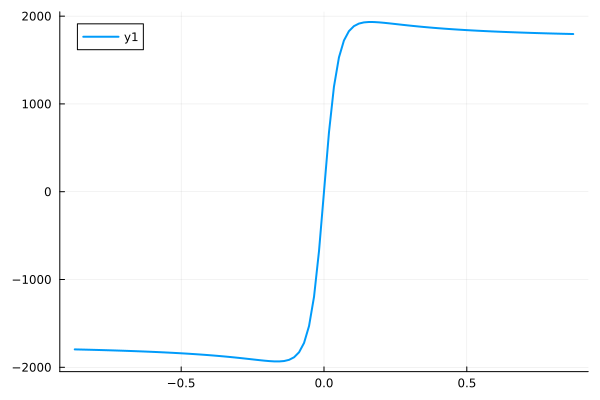

In [3]:
using Plots

plot(magicFormula, map(d -> deg2rad(d),-50:1:50), xticks=-1:0.5:1, linewidth=2)